In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from notebooks.online_learning.utils import plotting_utils
import matplotlib.pyplot as plt

In [2]:
phi_0_df = pd.read_csv('../../../data/ground/nominal_cluster/phi_one.csv')
phi_1_df = pd.read_csv('../../../data/ground/nominal_cluster/phi_two.csv')
phi_2_df = pd.read_csv('../../../data/ground/nominal_cluster/phi_three.csv')
phi_3_df = pd.read_csv('../../../data/ground/nominal_cluster/phi_four.csv')

In [3]:
df_concat = pd.concat([phi_0_df,phi_1_df,phi_2_df,phi_3_df],axis=0)

In [4]:
df_concat = df_concat.drop(columns=['OCV'])

In [5]:
df_concat.describe()

,Temp,Soc,C_1,R_0,R_1
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,25.000000,50.000000,12389.961001,0.012930,0.018851
std,10.356764,30.360957,5537.905909,0.005410,0.019956
min,10.000000,0.000000,103.544660,0.007287,0.006666
25%,15.000000,27.500000,8942.921395,0.009231,0.011082
50%,25.000000,50.000000,12218.239419,0.011153,0.014154
75%,35.000000,72.500000,14640.174790,0.015719,0.018466
max,40.000000,100.000000,41591.069006,0.043449,0.153520


In [6]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_concat)

/home/nicola_petkovic/miniconda3/envs/dt-rse/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/nicola_petkovic/miniconda3/envs/dt-rse/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/nicola_petkovic/miniconda3/envs/dt-rse/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/nicola_petkovic/miniconda3/envs/dt-rse/lib/python3.8/site-packages/sklearn/clus

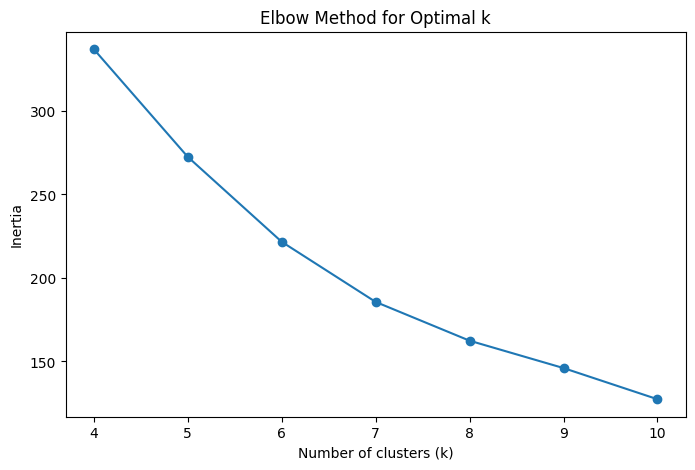

In [7]:
# Elbow Method to determine optimal k
inertia = []
k_values = range(4, 11)  # Testing k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [8]:
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(df_scaled)  
df_concat['Cluster'] = clusters

/home/nicola_petkovic/miniconda3/envs/dt-rse/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
df_concat.head(180)

,Temp,Soc,C_1,R_0,R_1,Cluster
0,15,0,9362.838793,0.016177,0.016432,3
1,15,10,9691.182929,0.016623,0.019499,3
2,15,20,12052.351794,0.017420,0.023310,3
3,15,30,9306.629723,0.018662,0.024055,3
4,15,40,5139.236488,0.024588,0.035098,3
...,...,...,...,...,...,...
25,40,90,16742.394808,0.007287,0.007439,0
26,40,80,16127.617984,0.008345,0.009962,0
27,40,70,13747.653421,0.008179,0.013117,0
28,40,60,20378.618383,0.008054,0.008413,1


In [10]:
df_concat.describe()

,Temp,Soc,C_1,R_0,R_1,Cluster
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,25.000000,50.000000,12389.961001,0.012930,0.018851,1.327778
std,10.356764,30.360957,5537.905909,0.005410,0.019956,1.190421
min,10.000000,0.000000,103.544660,0.007287,0.006666,0.000000
25%,15.000000,27.500000,8942.921395,0.009231,0.011082,0.000000
50%,25.000000,50.000000,12218.239419,0.011153,0.014154,1.000000
75%,35.000000,72.500000,14640.174790,0.015719,0.018466,3.000000
max,40.000000,100.000000,41591.069006,0.043449,0.153520,3.000000


In [11]:
dfs_by_cluster = {}
for cluster_number in df_concat['Cluster'].unique():
    dfs_by_cluster[cluster_number] = df_concat[df_concat['Cluster'] == cluster_number]

In [12]:
dfs_by_cluster[0].describe()

,Temp,Soc,C_1,R_0,R_1,Cluster
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.0
mean,29.339623,79.056604,12867.013494,0.009716,0.012037,0.0
std,6.866707,15.598835,2779.802326,0.001604,0.003061,0.0
min,20.000000,50.000000,8098.610489,0.007287,0.006666,0.0
25%,25.000000,70.000000,10731.028600,0.008633,0.010027,0.0
50%,25.000000,80.000000,12700.765497,0.009672,0.011437,0.0
75%,35.000000,90.000000,14423.149979,0.010545,0.013250,0.0
max,40.000000,100.000000,20517.297277,0.013956,0.018311,0.0


In [13]:
dfs_by_cluster[0] = dfs_by_cluster[0].rename(columns={'C_1':'c', 'R_1':'rc', 'R_0':'r0'})

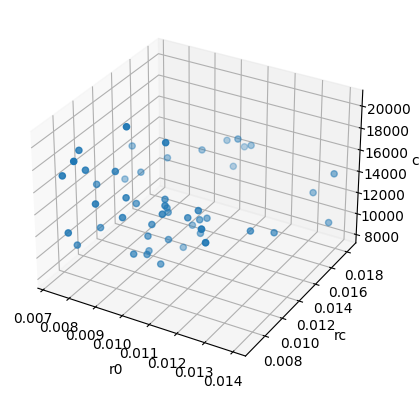

In [14]:
plotting_utils.threed_scatter(dfs_by_cluster[0].drop(columns=['Temp','Soc'], axis=1))

In [15]:
dfs_by_cluster[1].describe()

,Temp,Soc,C_1,R_0,R_1,Cluster
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.0
mean,31.594203,31.594203,16071.844625,0.010172,0.012918,1.0
std,6.992262,18.440938,5627.971015,0.001762,0.003547,0.0
min,20.000000,0.000000,10131.783114,0.007612,0.008126,1.0
25%,25.000000,20.000000,12892.563026,0.008396,0.010368,1.0
50%,30.000000,30.000000,14611.322527,0.010597,0.012140,1.0
75%,40.000000,50.000000,17015.376892,0.011531,0.014999,1.0
max,40.000000,60.000000,41591.069006,0.014450,0.026787,1.0


In [16]:
dfs_by_cluster[1] = dfs_by_cluster[1].rename(columns={'C_1':'c', 'R_1':'rc', 'R_0':'r0'})

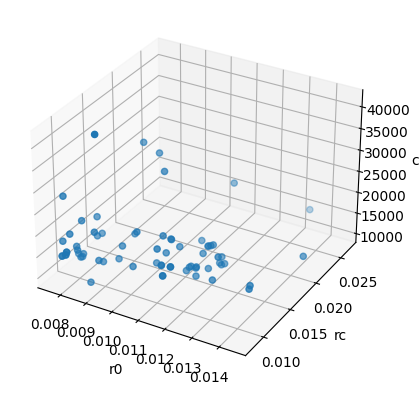

In [17]:
plotting_utils.threed_scatter(dfs_by_cluster[1].drop(columns=['Temp','Soc'], axis=1))

In [18]:
dfs_by_cluster[2].describe()

,Temp,Soc,C_1,R_0,R_1,Cluster
count,4.00,4.0,4.000000,4.000000,4.000000,4.0
mean,11.25,12.5,624.361218,0.028771,0.137798,2.0
std,2.50,25.0,1011.967976,0.009828,0.021040,0.0
min,10.00,0.0,103.544660,0.022908,0.108859,2.0
25%,10.00,0.0,105.365797,0.023435,0.128893,2.0
50%,10.00,0.0,125.933231,0.024364,0.144406,2.0
75%,11.25,12.5,644.928652,0.029700,0.153311,2.0
max,15.00,50.0,2142.033750,0.043449,0.153520,2.0


In [19]:
dfs_by_cluster[2] = dfs_by_cluster[2].rename(columns={'C_1':'c', 'R_1':'rc', 'R_0':'r0'})

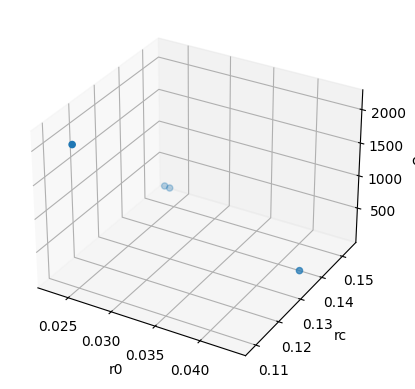

In [20]:
plotting_utils.threed_scatter(dfs_by_cluster[2].drop(columns=['Temp','Soc'], axis=1))

In [21]:
dfs_by_cluster[3].describe()

,Temp,Soc,C_1,R_0,R_1,Cluster
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.0
mean,13.333333,47.777778,8088.639648,0.018434,0.024309,3.0
std,4.952606,31.722063,2850.623631,0.004103,0.010207,0.0
min,10.000000,0.000000,976.466778,0.013612,0.013954,3.0
25%,10.000000,20.000000,6809.928951,0.015858,0.018272,3.0
50%,10.000000,50.000000,7717.072911,0.017717,0.021690,3.0
75%,15.000000,70.000000,9348.786525,0.019670,0.026635,3.0
max,25.000000,100.000000,15552.536417,0.034656,0.070274,3.0


In [22]:
dfs_by_cluster[3] = dfs_by_cluster[3].rename(columns={'C_1':'c', 'R_1':'rc', 'R_0':'r0'})

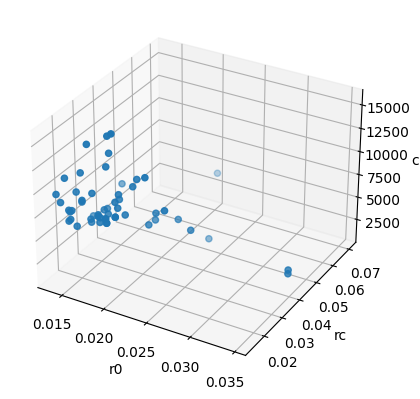

In [23]:
plotting_utils.threed_scatter(dfs_by_cluster[3].drop(columns=['Temp','Soc'], axis=1))

In [24]:
combined_df = pd.concat([dfs_by_cluster[0], dfs_by_cluster[1],
                         dfs_by_cluster[2], dfs_by_cluster[3]],
                        keys=['DF1', 'DF2', 'DF3', 'DF4'])

In [25]:
dfs_by_cluster[0].to_csv('phi_0.csv',index=False)
dfs_by_cluster[1].to_csv('phi_1.csv',index=False)
dfs_by_cluster[2].to_csv('phi_2.csv',index=False)
dfs_by_cluster[3].to_csv('phi_3.csv',index=False)

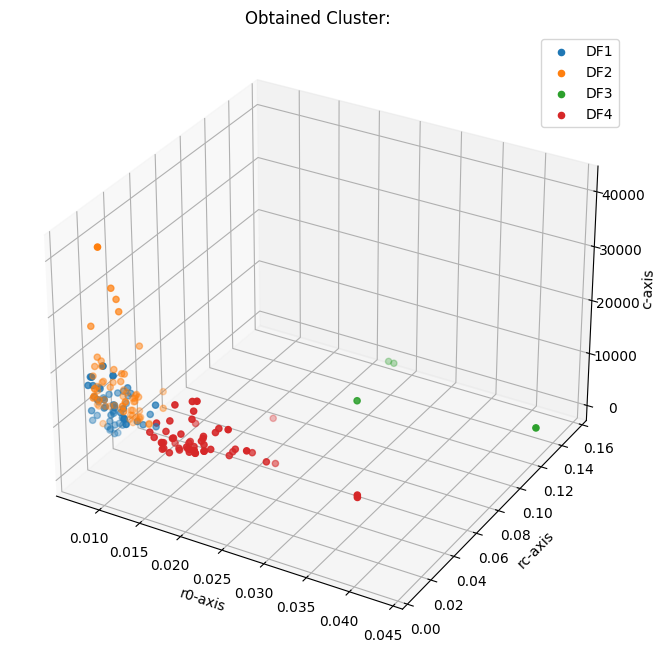

In [26]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for key, grp in combined_df.groupby(level=0):
    ax.scatter(grp['r0'], grp['rc'], grp['c'], label=key)

ax.set_title('Obtained Cluster:')
ax.set_xlabel('r0-axis')
ax.set_ylabel('rc-axis')
ax.set_zlabel('c-axis')
ax.legend()

plt.show()

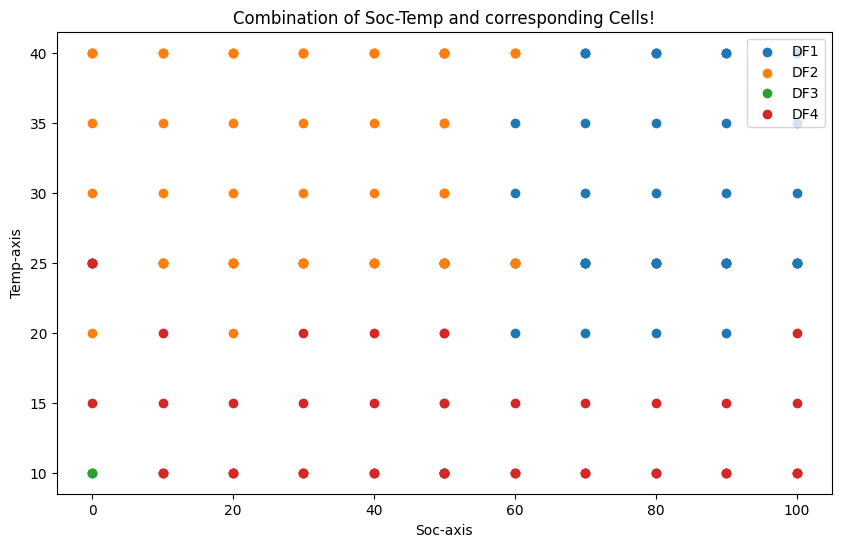

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))

for key, grp in combined_df.groupby(level=0):
    ax.scatter(grp['Soc'], grp['Temp'], label=key)

ax.set_title('Combination of Soc-Temp and corresponding Cells!')
ax.set_xlabel('Soc-axis')
ax.set_ylabel('Temp-axis')
ax.legend()

plt.show()

In [28]:
df_concat = df_concat.drop(columns=['Cluster'], axis=1)

## DBSCAN
# 1. Elbow Analysis with KNN
# 2. Add the same plots used for the k-means

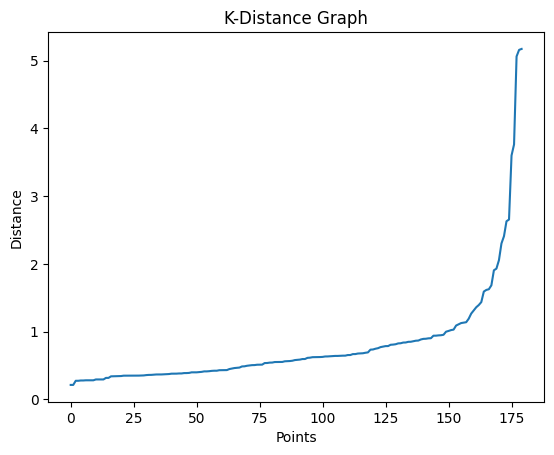

In [29]:
# Step 1: Extract features (all columns in this example)
X = df_concat.values

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Compute k-distances for elbow analysis
k = 6  # Typically min_samples + 1
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort and plot k-distances
distances = np.sort(distances[:, k - 1], axis=0)  # Distance to the k-th nearest neighbor
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.title("K-Distance Graph")
plt.show()

In [30]:
# Step 1: Extract features (all columns in this example)
X = df_concat.values

# Step 2: Standardize the data (if necessary)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN
# Adjust eps and min_samples based on your data
db = DBSCAN(eps=0.80, min_samples=5).fit(X_scaled)

# Step 4: Add cluster labels to your DataFrame
df_concat['DBSCANclusters'] = db.labels_

# Step 5: Inspect the clustering results
print(df_concat['DBSCANclusters'].value_counts())
print(df_concat.head())

 0    152
-1     24
 1      4
Name: DBSCANclusters, dtype: int64
   Temp  Soc           C_1       R_0       R_1  DBSCANclusters
0    15    0   9362.838793  0.016177  0.016432               0
1    15   10   9691.182929  0.016623  0.019499               0
2    15   20  12052.351794  0.017420  0.023310               0
3    15   30   9306.629723  0.018662  0.024055               0
4    15   40   5139.236488  0.024588  0.035098              -1


In [32]:
dfs_by_dbscan_cluster = {}
for cluster_number in df_concat['DBSCANclusters'].unique():
    dfs_by_dbscan_cluster[cluster_number] = df_concat[df_concat['DBSCANclusters'] == cluster_number]

In [33]:
df_concat = df_concat.drop(columns=['DBSCANclusters'], axis=1)

In [43]:
combined_dbscan_df = pd.concat([dfs_by_dbscan_cluster[0],dfs_by_dbscan_cluster[1],
                                dfs_by_dbscan_cluster[-1]],                     
                                keys=['DF1', 'DF2', 'DF3', 'DF4', 'DF5', 'DF6', 'DF7', 'DF8'])

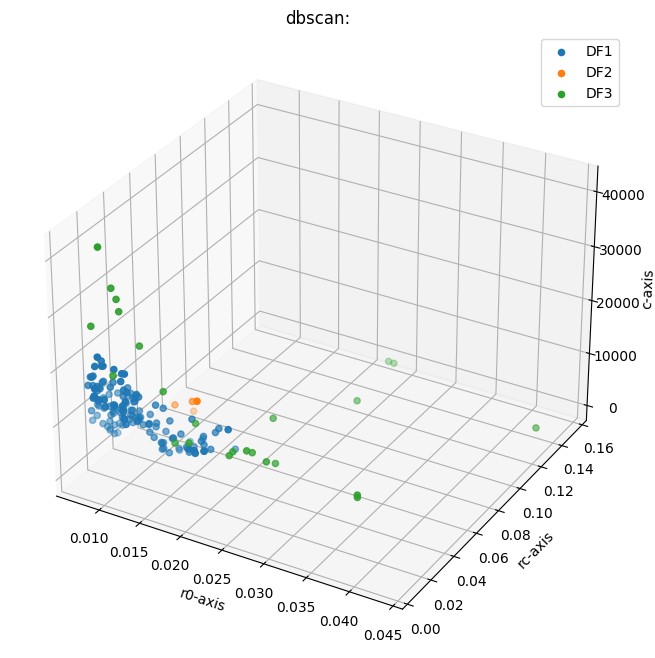

In [44]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for key, grp in combined_dbscan_df.groupby(level=0):
    ax.scatter(grp['R_0'], grp['R_1'], grp['C_1'], label=key)

ax.set_title('dbscan:')
ax.set_xlabel('r0-axis')
ax.set_ylabel('rc-axis')
ax.set_zlabel('c-axis')
ax.legend()

plt.show()

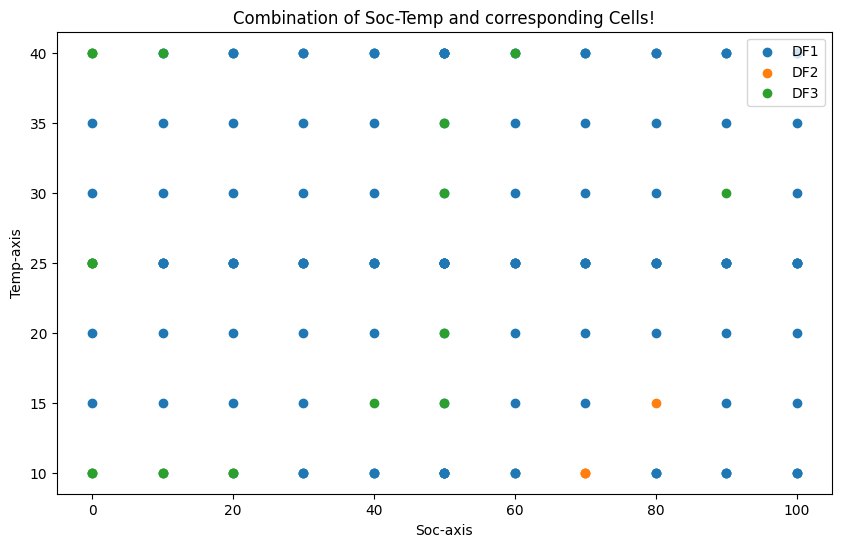

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))

for key, grp in combined_dbscan_df.groupby(level=0):
    ax.scatter(grp['Soc'], grp['Temp'], label=key)

ax.set_title('Combination of Soc-Temp and corresponding Cells!')
ax.set_xlabel('Soc-axis')
ax.set_ylabel('Temp-axis')
ax.legend()

plt.show()

## Hierarchical clustering

/home/nicola_petkovic/miniconda3/envs/dt-rse/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0    98
3    41
1    38
2     3
Name: Hierarchical_clusters, dtype: int64
   Temp  Soc           C_1       R_0       R_1  Hierarchical_clusters
0    15    0   9362.838793  0.016177  0.016432                      1
1    15   10   9691.182929  0.016623  0.019499                      1
2    15   20  12052.351794  0.017420  0.023310                      1
3    15   30   9306.629723  0.018662  0.024055                      1
4    15   40   5139.236488  0.024588  0.035098                      1


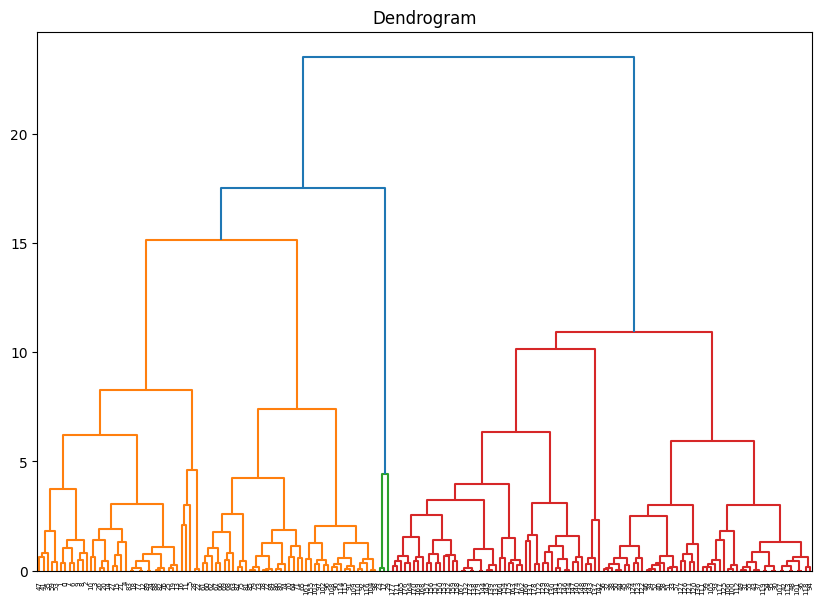

In [37]:
# Step 1: Extract features (all columns in this example)
X = df_concat.values

# Step 2: Standardize the data (if necessary)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply Hierarchical Clustering
# Adjust the number of clusters (n_clusters) as necessary
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
df_concat['Hierarchical_clusters'] = hc.fit_predict(X_scaled)

# Step 4: Inspect the clustering results
print(df_concat['Hierarchical_clusters'].value_counts())
print(df_concat.head())

# Step 5 (Optional): Plot a Dendrogram
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram')
plt.show()

In [38]:
dfs_by_hierarchical_cluster = {}
for cluster_number in df_concat['Hierarchical_clusters'].unique():
    dfs_by_hierarchical_cluster[cluster_number] = df_concat[df_concat['Hierarchical_clusters'] == cluster_number]

In [39]:
dfs_by_hierarchical_cluster[0].describe()

,Temp,Soc,C_1,R_0,R_1,Hierarchical_clusters
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.0
mean,32.193878,45.408163,15543.006632,0.009762,0.012478,0.0
std,6.737582,25.972562,4988.581162,0.001620,0.003470,0.0
min,25.000000,0.000000,10131.783114,0.007287,0.006666,0.0
25%,25.000000,22.500000,12800.922826,0.008167,0.009903,0.0
50%,30.000000,50.000000,14412.970161,0.009821,0.011793,0.0
75%,40.000000,60.000000,16597.631361,0.011153,0.014677,0.0
max,40.000000,100.000000,41591.069006,0.013520,0.026787,0.0


In [40]:
combined_hierarchical_df = pd.concat([dfs_by_hierarchical_cluster[0], dfs_by_hierarchical_cluster[1],
                         dfs_by_hierarchical_cluster[2], dfs_by_hierarchical_cluster[3]],
                        keys=['DF1', 'DF2', 'DF3', 'DF4'])

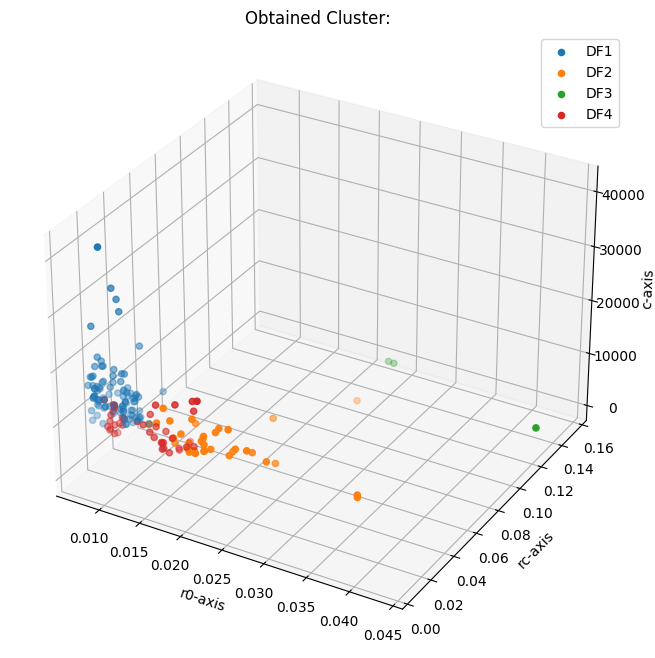

In [41]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for key, grp in combined_hierarchical_df.groupby(level=0):
    ax.scatter(grp['R_0'], grp['R_1'], grp['C_1'], label=key)

ax.set_title('Obtained Cluster:')
ax.set_xlabel('r0-axis')
ax.set_ylabel('rc-axis')
ax.set_zlabel('c-axis')
ax.legend()

plt.show()

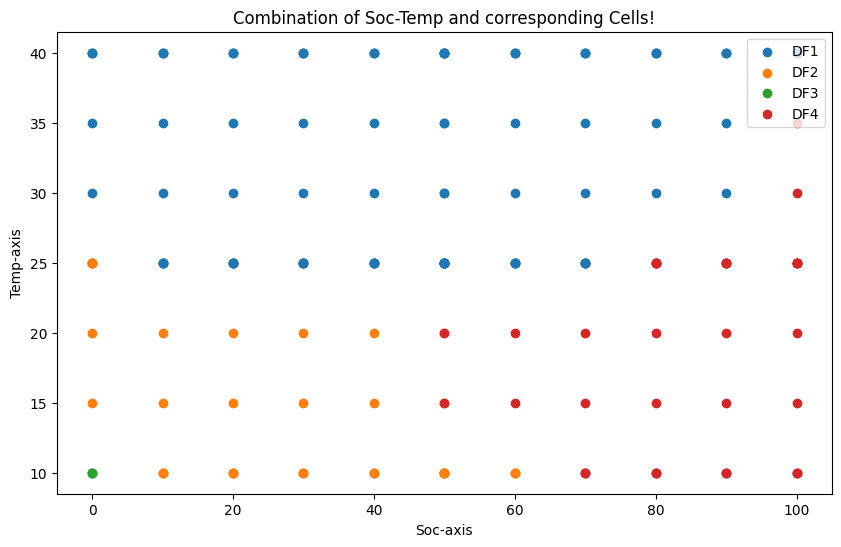

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))

for key, grp in combined_hierarchical_df.groupby(level=0):
    ax.scatter(grp['Soc'], grp['Temp'], label=key)

ax.set_title('Combination of Soc-Temp and corresponding Cells!')
ax.set_xlabel('Soc-axis')
ax.set_ylabel('Temp-axis')
ax.legend()

plt.show()

## Single plot for the parameters: the aim is to validate the clusters(see discord lines!) 